# Statistics : Examples from Epidemiology

## What is Epidemiology

![London cholera outbreak and John Snow (1854)](Images/Snow.jpg)
*Figure: London cholera outbreak and John Snow (1854)*

Understang the distribution and the cause of disease and other health related variables

## Pyramid of Evidence

![pyramid](Images/pyramid.jpg)
*Figure: Pyramid of Evidence (Davey Smith, 2018)*

### Randomized Controlled Trials
$$ y = X \beta + \epsilon $$

* $y$ : Outcome
* $X$ : Exposure
* $\epsilon$ : random error

And... the most important part : _$X$ and $\epsilon$ is independent_

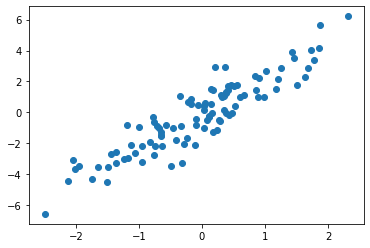

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     487.6
Date:                Tue, 05 Nov 2019   Prob (F-statistic):           7.96e-40
Time:                        01:39:46   Log-Likelihood:                -137.75
No. Observations:                 100   AIC:                             279.5
Df Residuals:                      98   BIC:                             284.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0592      0.097     -0.610      0.5

In [3]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# suppose y = 2x + \epsilon

# sample x, epsilon and create y
n = 100 # 100 samples
x = np.random.normal(loc=0, scale=1, size=n)
e = np.random.normal(loc=0, scale=1, size=n)
y = 2 * x + e

plt.scatter(x,y)
plt.show()

# acuqire b using OLS
model = sm.OLS(y, sm.add_constant(x))
result = model.fit()
print(result.summary())




### Non-independence of errors
$$ y = X \beta + \epsilon $$

* $y$ : Outcome
* $X$ : Exposure
* $\epsilon$ : random error

We assumed that error $\epsilon$ and $X$ is indendent.

However, what happens when this assumption is violated?

This happens frequently when randomization is not possible since such experiements are impossible to conduct under many conditions.

Suppose that,
$$(X,\epsilon) \sim N(\mathbf{0}, \Sigma)$$
where $ \Sigma = \begin{pmatrix} 1 & 0.5 \\ 0.5 & 1 \end{pmatrix}$

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     39.11
Date:                Tue, 05 Nov 2019   Prob (F-statistic):           1.05e-08
Time:                        01:39:49   Log-Likelihood:                -108.76
No. Observations:                 100   AIC:                             221.5
Df Residuals:                      98   BIC:                             226.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0343      0.073     -0.472      0.6

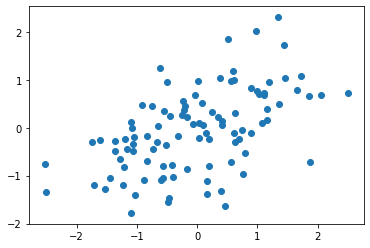

In [4]:
# sample x and e
x, e = np.random.multivariate_normal(mean=[0,0], cov=[[1,0.5],[0.5,1]], size=n).T
y = e
plt.scatter(x,y)
plt.plot()

# acuqire b using OLS
model = sm.OLS(y, sm.add_constant(x))
result = model.fit()
print(result.summary())

### Confounding
One cause of such non-independence between the exposure ($X$) and the error ($\epsilon$) is called confounding.

Confounding happens when the exposure and the outcome of interest has a common cause. For example,
![confounder](Images/confounder.png)
*Figure: Adopted from https://blogs.qub.ac.uk/griefstudy/*





### Cohort Study and Case-Control Study
Cohort study and Case-Control study are common study designs used when randomization is inadequate.
As described above, these designs are prone to confounding. 
However, they are still useful in number of ways.

This is how they look like:
![cohort](Images/cohort.png)
*Figure: Cohort study. Adopted from Gordis, 2018*

![cc](Images/cc.png)
*Figure: Case-Control study. Adopted from Gordis, 2018*

When the confounder is known, we can correct (or adjust) the bias due to its effect.
Reminding the above example of coffee and cancer, the following code shows an example of such correction.


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     14.43
Date:                Tue, 05 Nov 2019   Prob (F-statistic):           0.000252
Time:                        01:44:32   Log-Likelihood:                -166.13
No. Observations:                 100   AIC:                             336.3
Df Residuals:                      98   BIC:                             341.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0096      0.129     -0.075      0.9

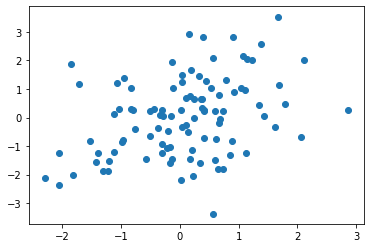

In [17]:
# sample x and e
coffee, smoking = np.random.multivariate_normal(mean=[0,0], cov=[[1,0.5],[0.5,1]], size=n).T
e = np.random.normal(loc=0, scale=1, size=n)
cancer = smoking + e
plt.scatter(coffee, cancer)
plt.plot()

# acqire b using OLS without adjustment
model = sm.OLS(cancer, sm.add_constant(coffee))
result = model.fit()
print(result.summary())

# acquire b using OLS with adjustment
X = np.array([coffee,smoking]).T
model_adjust = sm.OLS(cancer, sm.add_constant(X))
result_adjust = model_adjust.fit()
print(result_adjust.summary())
